In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
cols = ['snoring_rate',
'respiration_rate',
'body_temperature',
'limb_movement',
'blood_oxygen',
'eye_movement',
'sleeping_hours',
'heart_rate',
'stress_level']

In [3]:
# pth="/content/drive/MyDrive/MSIB/06. Classification/"

In [3]:
df = pd.read_csv("SaYoPillow.csv")
df.columns = cols
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [4]:
df['stress_level'].value_counts()

4    126
3    126
2    126
1    126
0    126
Name: stress_level, dtype: int64

In [5]:
x = df.drop('stress_level',axis=1)
y = df.stress_level

In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,dummy_y, train_size = 0.7)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(441, 8) (189, 8)
(441, 5) (189, 5)


In [8]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [9]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=1, validation_data=[x_test, y_test])

Epoch 1/150
45/45 [==============================] - 0s 6ms/step - loss: 0.1495 - accuracy: 1.0000 - val_loss: 0.1392 - val_accuracy: 1.0000
Epoch 2/150
45/45 [==============================] - 0s 4ms/step - loss: 0.1461 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 1.0000
Epoch 3/150
45/45 [==============================] - 0s 4ms/step - loss: 0.1498 - accuracy: 1.0000 - val_loss: 0.1439 - val_accuracy: 1.0000
Epoch 4/150
45/45 [==============================] - 0s 7ms/step - loss: 0.1422 - accuracy: 1.0000 - val_loss: 0.1339 - val_accuracy: 1.0000
Epoch 5/150
45/45 [==============================] - 0s 8ms/step - loss: 0.1381 - accuracy: 1.0000 - val_loss: 0.1270 - val_accuracy: 1.0000
Epoch 6/150
45/45 [==============================] - 0s 4ms/step - loss: 0.1325 - accuracy: 1.0000 - val_loss: 0.1252 - val_accuracy: 1.0000
Epoch 7/150
45/45 [==============================] - 0s 4ms/step - loss: 0.1302 - accuracy: 1.0000 - val_loss: 0.1221 - val_accuracy: 1.0000
Epoch 8/150
4

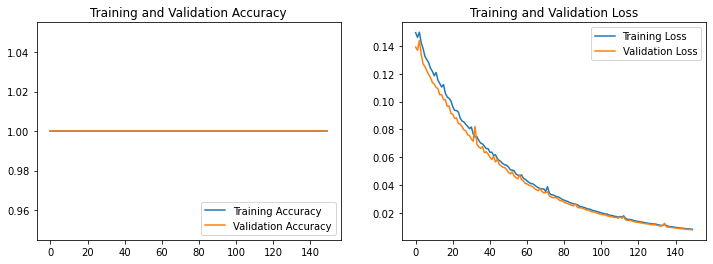

In [14]:
# visualisasi data hasil pelatihan model

from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 5ms/step - loss: 0.0078 - accuracy: 1.0000
Accuracy: 100.00


In [16]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([0, 1, 4, 1, 1, 4, 1, 4, 0, 4, 0, 2, 3, 3, 2, 1, 1, 0, 3, 0, 1, 3,
       0, 3, 2, 1, 0, 1, 3, 0, 2, 1, 1, 4, 1, 0, 3, 0, 2, 2, 1, 4, 1, 1,
       4, 4, 0, 4, 1, 3, 3, 3, 0, 2, 2, 4, 3, 2, 0, 0, 4, 3, 0, 1, 4, 2,
       4, 1, 1, 4, 4, 2, 4, 2, 1, 4, 3, 3, 0, 0, 2, 1, 4, 0, 3, 0, 4, 1,
       3, 1, 4, 4, 2, 4, 1, 0, 3, 2, 3, 0, 1, 3, 1, 2, 3, 3, 0, 1, 4, 1,
       0, 3, 1, 1, 2, 0, 4, 1, 1, 1, 1, 0, 1, 1, 0, 3, 2, 2, 1, 1, 3, 4,
       3, 0, 4, 3, 0, 1, 1, 2, 2, 0, 3, 0, 1, 0, 2, 3, 3, 2, 1, 4, 0, 4,
       1, 1, 4, 4, 4, 2, 2, 1, 2, 4, 4, 2, 4, 3, 2, 0, 1, 4, 2, 4, 2, 1,
       4, 0, 2, 4, 3, 0, 2, 2, 3, 4, 2, 4, 2], dtype=int64)

<AxesSubplot:>

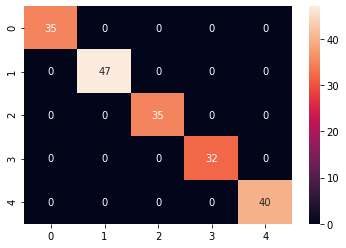

In [17]:
y_test_class = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True)